**Penambangan Data B**

**Nama Anggota Kelompok :**


1. Risma Faoziya - 24060119120001
2. Doma Zaneta - 24060119140069
3. Gregorius Willy Adiguno - 24060119130076
4. Sekar Wangi Kusumastomo - 24060119120020
5. Agry Apri Astuti - 24060119120009

# **Regression - [Used Cars Price Prediction](https://www.kaggle.com/datasets/avikasliwal/used-cars-price-prediction?select=test-data.csv)**

 ## **Import Library**

*Category encoders* merupakan satu set transformer *scikit-learn-style* yang digunakan untuk mengkodekan (*encoding*) variabel kategoris menjadi numerik dengan teknik-teknik yang berbeda.

In [103]:
pip install category-encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/














In [104]:
# Packages for EDA
import numpy as np
import pandas as pd
import seaborn as sns

# Data Preprocessing
from sklearn import preprocessing
import category_encoders as ce
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split

# Modeling
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV
np.seterr(divide='ignore', invalid='ignore', over='ignore')

# Plotting
%matplotlib inline
sns.set(rc={'figure.figsize':[7,14]}, font_scale=1.2) # Standard figure size for all
import matplotlib.pyplot as plt

# Load Data
from google.colab import drive

## **Load Data**

In [105]:
# Untuk memuat data dari Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **1. Data Understanding**

[Link Used Cars Price Prediction Dataset](https://drive.google.com/file/d/1DCb4PtLS1Q8ClNRvlt4cncIYhsaTj97X/view?usp=share_link)

In [106]:
# Mendefinisikan path data
data_csv = '/content/drive/My Drive/dataset/Used_Cars_Price_Prediction/train-data.csv'

# Membaca data
data = pd.read_csv(data_csv)

In [107]:
data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


### **Investigation**

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 6019 entries, 0 to 6018

Data columns (total 14 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         6019 non-null   int64  

 1   Name               6019 non-null   object 

 2   Location           6019 non-null   object 

 3   Year               6019 non-null   int64  

 4   Kilometers_Driven  6019 non-null   int64  

 5   Fuel_Type          6019 non-null   object 

 6   Transmission       6019 non-null   object 

 7   Owner_Type         6019 non-null   object 

 8   Mileage            6017 non-null   object 

 9   Engine             5983 non-null   object 

 10  Power              5983 non-null   object 

 11  Seats              5977 non-null   float64

 12  New_Price          824 non-null    object 

 13  Price              6019 non-null   float64

dtypes: float64(2), int64(3), object(9)

memory usage: 658.5+ KB


*Output* di atas menunjukkan bahwa terdapat 5 kolom numerik (Unnamed, Year, Kilometers_Driven, Seats, dan Price) dan 9 kolom kategoris (Name, Location, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, dan New_Price). *Output* di atas juga menunjukkan bahwa terdapat nilai null pada fitur Mileage, Engine, Power, Seats, dan New_Price.

In [109]:
data.shape

(6019, 14)

*Output* di atas menunjukkan terdapat 6019 baris data dan 14 kolom pada *train data* sebelum dilakukan *preprocessing data*.

In [110]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


## **2. Data Cleaning**

#### **Checking Duplicated Values**

In [111]:
data.duplicated().sum()

0

*Output* di atas menunjukkan bahwa tidak terdapat data duplikat pada dataset.

#### **Dropping New_Price Column**

Menghilangkan kolom "New_Price" karena kebanyakan nilainya = null

In [112]:
data.drop("New_Price", axis=1,inplace=True)

#### **Imputing Null Values**

*SimpleImputer* adalah kelas *scikit-learn* yang membantu dalam menangani data yang hilang (*missing data*) menggunakan statistik deskriptif (mis. mean, median, atau modus) di sepanjang setiap kolom, atau gunakan nilai konstanta. *SimpleImputer* pada kode di bawah digunakan untuk menggantikan nilai NaN pada fitur Mileage, Engine, Power, dan Seats dengan nilai yang paling sering muncul (modus) di masing-masing fitur terkait.

In [113]:
from sklearn.impute import SimpleImputer
null_col = ['Mileage', 'Engine', 'Power', 'Seats']

imputer = SimpleImputer(strategy='most_frequent') # menggantikan null values dengan menggunakan modus dari tiap kolom
data[null_col] = imputer.fit_transform(data[null_col])

Memastikan bahwa semua tipe data benar

In [114]:
data = data.convert_dtypes()

Mengubah kolom menjadi dtypes sebaik mungkin menggunakan dtypes yang mendukung.

In [115]:
data.shape

(6019, 13)

#### **Impute zeros in Seats column**

Menggantikan nilai 0 pada kolom Seat, karena pada suatu mobil pasti memiliki seat (tempat duduk) >= 1.

In [116]:
null_seats = data[data['Seats']==0].index
null_seats

Int64Index([3999], dtype='int64')

In [117]:
data.iloc[null_seats,11] # 11 merupakan indeks kolom Seats

3999    0
Name: Seats, dtype: Int64

Fungsi *replace* pada kode di bawah digunakan untuk menggantikan nilai 0 pada fitur Seats dengan nilai modus pada fitur Seats, yaitu 5.

In [118]:
data['Seats'].replace(to_replace=0, value=data['Seats'].mode()[0], inplace=True)

In [119]:
data['Seats'].mode()[0]

5

#### **Impute 'null bhp' values in Power Column**

Kode di bawah digunakan untuk menampilkan baris-baris data yang memiliki nilai pada fitur Power == 'null bhp'.

In [120]:
data[data['Power']=='null bhp']

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
76,76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399 CC,null bhp,5,2.0
79,79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086 CC,null bhp,5,1.3
89,89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086 CC,null bhp,5,2.1
120,120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5,0.85
143,143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086 CC,null bhp,5,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5873,5873,Hyundai Santro Xing XO eRLX Euro II,Pune,2006,47200,Petrol,Manual,Second,17.0 kmpl,1086 CC,null bhp,5,1.2
5893,5893,Maruti Estilo LXI,Chennai,2008,51000,Petrol,Manual,Second,19.5 kmpl,1061 CC,null bhp,5,1.75
5925,5925,Skoda Laura Classic 1.8 TSI,Pune,2010,85000,Petrol,Manual,First,17.5 kmpl,1798 CC,null bhp,5,2.85
5943,5943,Mahindra Jeep MM 540 DP,Chennai,2002,75000,Diesel,Manual,First,0.0 kmpl,2112 CC,null bhp,6,1.7


Kode di bawah digunakan untuk mendapatkan indeks dari baris data yang memiliki nilai fitur Power == 'null bhp'.

In [121]:
indx = data[data['Power'] == 'null bhp'].index

In [122]:
type(indx)

pandas.core.indexes.numeric.Int64Index

In [123]:
indx.shape

(107,)

*Output* di atas menunjukkan bahwa terdapat 107 data yang memiliki nilai pada fitur Power == 'null bhp'. Kemudian, dengan kode di bawah 107 data tersebut dihapus.

In [124]:
data.drop(indx, axis=0, inplace=True)

In [125]:
data.shape

(5912, 13)

*   (KMPL) ~ Kilometers Per Lite
*   (km/kg) ~ Kilometers Per Kilogram

  1 liter = 1 kilogram

* References : https://en.wikipedia.org/wiki/Litre



In [126]:
dirty_cols = ['Mileage', 'Engine', 'Power']

Kode di bawah akan memisahkan data numerik yang miliki satuan, seperti pada fitur Mileage terdapat satuan kmpl, fitur Engine terdapat satuan CC, serta fitur Power terdapat satuan bhp, dan hanya menggunakan data numeriknya saja (membuang satuannya).

In [127]:
for col in dirty_cols:
  data[col] = data[col].apply(lambda x : float(x.split()[0]))

Values Health Checking

In [128]:
data.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
993,993,Mercedes-Benz New C-Class C 220 CDI Avantgarde,Kochi,2015,63983,Diesel,Automatic,First,19.27,2143.0,170.00,5,16.56
2217,2217,Toyota Corolla Altis D-4D G,Kochi,2013,81504,Diesel,Manual,First,21.43,1364.0,87.20,5,6.53
4798,4798,BMW X5 3.0d,Chennai,2009,110000,Diesel,Automatic,First,11.00,2993.0,235.00,5,18.0
4799,4799,Hyundai Xcent 1.2 Kappa S,Coimbatore,2015,45960,Petrol,Manual,First,19.10,1197.0,82.00,5,5.56
3988,3988,Tata Indigo eCS eLX BS IV,Ahmedabad,2013,31000,Diesel,Manual,First,25.00,1396.0,69.01,5,2.7


*Output* di atas menunjukkan data setelah dibersihkan.

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 5912 entries, 0 to 6018

Data columns (total 13 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         5912 non-null   Int64  

 1   Name               5912 non-null   string 

 2   Location           5912 non-null   string 

 3   Year               5912 non-null   Int64  

 4   Kilometers_Driven  5912 non-null   Int64  

 5   Fuel_Type          5912 non-null   string 

 6   Transmission       5912 non-null   string 

 7   Owner_Type         5912 non-null   string 

 8   Mileage            5912 non-null   float64

 9   Engine             5912 non-null   float64

 10  Power              5912 non-null   float64

 11  Seats              5912 non-null   Int64  

 12  Price              5912 non-null   Float64

dtypes: Float64(1), Int64(4), float64(3), string(5)

memory usage: 675.5 KB


*Output* di atas menunjukkan bahwa terdapat 5912 baris data dengan 13 kolom setelah data di-*preprocessing*.

In [130]:
data.shape

(5912, 13)

### **Feature Engineering**

In [131]:
# Check Name column uniques
data['Name'].nunique()

1830

`nunique` mengembalikan jumlah nilai unik untuk setiap kolom.

In [132]:
print('Percentage of uniques', round(data['Name'].nunique()/data.shape[0]*100), '%')

Percentage of uniques 31 %


Fitur Name tidak memiliki efek yang signifikan karena fitur ini memiliki banyak sekali nilai-nilai unik. Jadi, di sini akan dilakukan *feature engineering* supaya fitur Name menjadi lebih berguna dan bermanfaat.

In [133]:
data['Name']

0                 Maruti Wagon R LXI CNG
1       Hyundai Creta 1.6 CRDi SX Option
2                           Honda Jazz V
3                      Maruti Ertiga VDI
4        Audi A4 New 2.0 TDI Multitronic
                      ...               
6014                    Maruti Swift VDI
6015            Hyundai Xcent 1.1 CRDi S
6016               Mahindra Xylo D4 BSIV
6017                  Maruti Wagon R VXI
6018               Chevrolet Beat Diesel
Name: Name, Length: 5912, dtype: string

*Output* di atas menunjukkan bahwa kata pertama dari nama adalah sebuah merk (*brand*), dengan kode di bawah, kita hanya akan mengambil *brand*nya saja.

In [134]:
data['Brand'] = data['Name'].apply(lambda x : x.split()[0])

In [135]:
data['Brand']

0          Maruti
1         Hyundai
2           Honda
3          Maruti
4            Audi
          ...    
6014       Maruti
6015      Hyundai
6016     Mahindra
6017       Maruti
6018    Chevrolet
Name: Brand, Length: 5912, dtype: object

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 5912 entries, 0 to 6018

Data columns (total 14 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         5912 non-null   Int64  

 1   Name               5912 non-null   string 

 2   Location           5912 non-null   string 

 3   Year               5912 non-null   Int64  

 4   Kilometers_Driven  5912 non-null   Int64  

 5   Fuel_Type          5912 non-null   string 

 6   Transmission       5912 non-null   string 

 7   Owner_Type         5912 non-null   string 

 8   Mileage            5912 non-null   float64

 9   Engine             5912 non-null   float64

 10  Power              5912 non-null   float64

 11  Seats              5912 non-null   Int64  

 12  Price              5912 non-null   Float64

 13  Brand              5912 non-null   object 

dtypes: Float64(1), Int64(4), float64(3), object(1), string(5)

memory usage: 721.7+ KB


In [137]:
data['Brand'].nunique()

30

*Output* di atas menunjukkan bahwa nilai unik sudah berkurang banyak, dan oleh karenanya kita dapat mendapatkan banyak efek dari fitur Name.

Observasi lain bahwa 2 kata pertama dalam Name dapat mengekspresikan mobil yang kita inginkan. Oleh karena itu kode di bawah ini akan mengambil 2 kata pertama dari Name.

In [138]:
data['Name'] = data['Name'].apply(lambda x: " ".join(x.split()[:2]))

In [139]:
data['Name'].nunique()

209

*   That's great, Now we can make an affect with name column.




In [140]:
data = data.convert_dtypes()

In [141]:
data.sample(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
5909,5909,Toyota Fortuner,Delhi,2015,90000,Diesel,Automatic,First,12.55,2982,168.5,7,21.5,Toyota
1139,1139,Hyundai Grand,Delhi,2017,8471,Petrol,Manual,First,18.9,1197,81.86,5,5.0,Hyundai
4792,4792,Toyota Fortuner,Chennai,2010,242000,Diesel,Manual,First,11.5,2982,171.0,7,11.0,Toyota
655,655,Jaguar XJ,Mumbai,2017,10501,Petrol,Automatic,First,9.43,1999,237.4,5,75.0,Jaguar
467,467,Honda City,Kolkata,2011,48466,Petrol,Manual,First,17.0,1497,118.0,5,3.26,Honda


In [142]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 5912 entries, 0 to 6018

Data columns (total 14 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         5912 non-null   Int64  

 1   Name               5912 non-null   string 

 2   Location           5912 non-null   string 

 3   Year               5912 non-null   Int64  

 4   Kilometers_Driven  5912 non-null   Int64  

 5   Fuel_Type          5912 non-null   string 

 6   Transmission       5912 non-null   string 

 7   Owner_Type         5912 non-null   string 

 8   Mileage            5912 non-null   Float64

 9   Engine             5912 non-null   Int64  

 10  Power              5912 non-null   Float64

 11  Seats              5912 non-null   Int64  

 12  Price              5912 non-null   Float64

 13  Brand              5912 non-null   string 

dtypes: Float64(3), Int64(5), string(6)

memory usage: 739.0 KB


In [143]:
data.describe()

,Unnamed: 0,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Price
count,5912.000000,5912.000000,5.912000e+03,5912.000000,5912.000000,5912.000000,5912.00000,5912.000000
mean,3012.791272,2013.450609,5.837766e+04,18.231778,1622.857070,113.014026,5.28180,9.584919
std,1735.810485,3.188638,9.189848e+04,4.431628,600.877459,53.797403,0.80269,11.233694
min,0.000000,1998.000000,1.710000e+02,0.000000,72.000000,34.200000,2.00000,0.440000
25%,1510.750000,2012.000000,3.351275e+04,15.260000,1198.000000,75.000000,5.00000,3.500000
50%,3013.500000,2014.000000,5.286250e+04,18.200000,1493.000000,94.000000,5.00000,5.700000
75%,4515.250000,2016.000000,7.245375e+04,21.100000,1984.000000,138.100000,5.00000,10.012500
max,6018.000000,2019.000000,6.500000e+06,33.540000,5998.000000,560.000000,10.00000,160.000000


In [144]:
data.to_csv('Cleaned_Data.csv')

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 5912 entries, 0 to 6018

Data columns (total 14 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         5912 non-null   Int64  

 1   Name               5912 non-null   string 

 2   Location           5912 non-null   string 

 3   Year               5912 non-null   Int64  

 4   Kilometers_Driven  5912 non-null   Int64  

 5   Fuel_Type          5912 non-null   string 

 6   Transmission       5912 non-null   string 

 7   Owner_Type         5912 non-null   string 

 8   Mileage            5912 non-null   Float64

 9   Engine             5912 non-null   Int64  

 10  Power              5912 non-null   Float64

 11  Seats              5912 non-null   Int64  

 12  Price              5912 non-null   Float64

 13  Brand              5912 non-null   string 

dtypes: Float64(3), Int64(5), string(6)

memory usage: 739.0 KB


Kode di atas akan menyimpan data yang sudah dibersihkan menjadi dalam format csv.

### Univariate Analysis (Menganalisis persebaran data tiap kolom numerik)

#### Kilometers_Driven Column

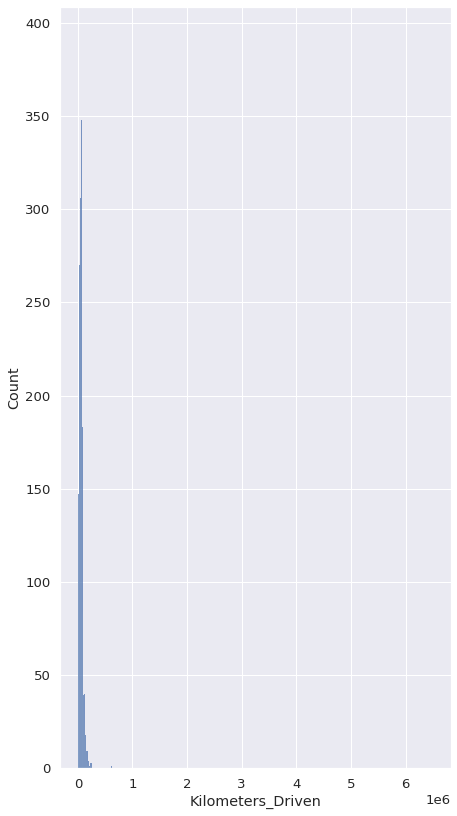

In [146]:
sns.histplot(data=data, x='Kilometers_Driven');

#### Mileage Column

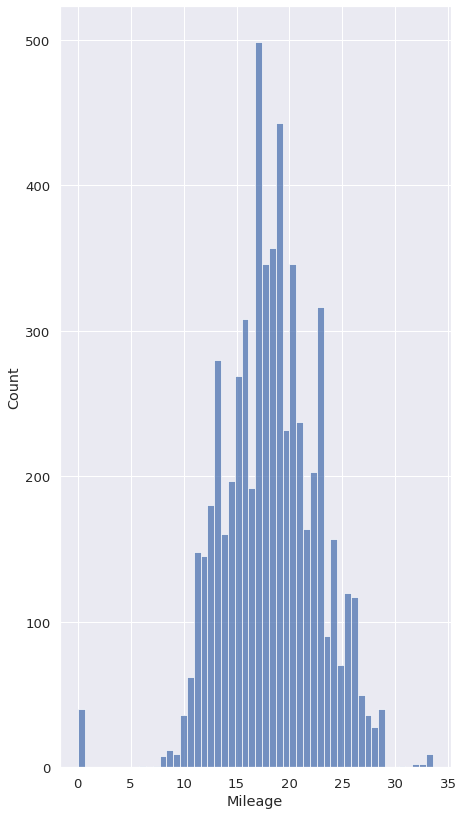

In [147]:
sns.histplot(data=data, x='Mileage');

#### Engine Column

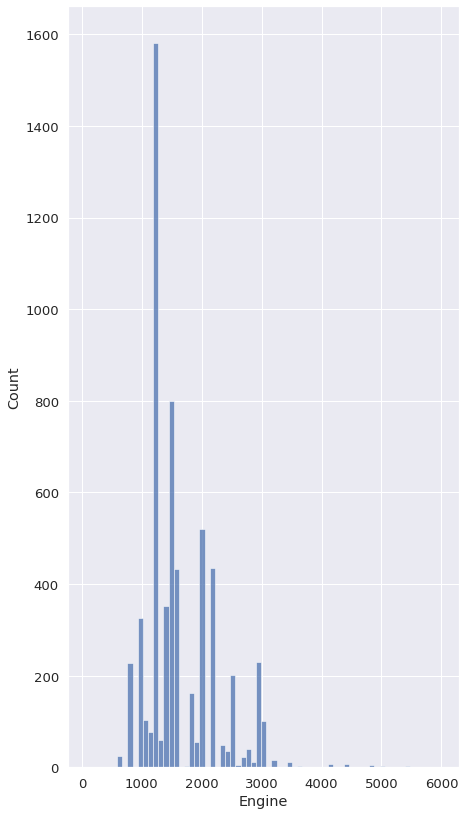

In [148]:
sns.histplot(data=data, x='Engine');

#### Power Column

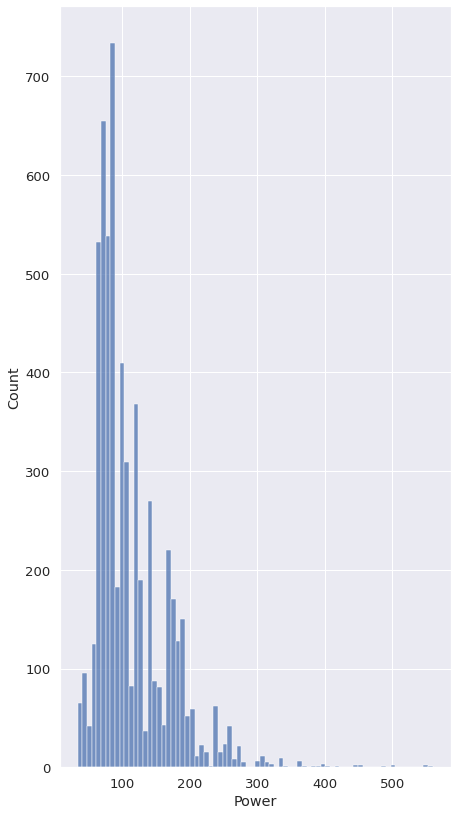

In [149]:
sns.histplot(data=data, x='Power');

#### Price Column

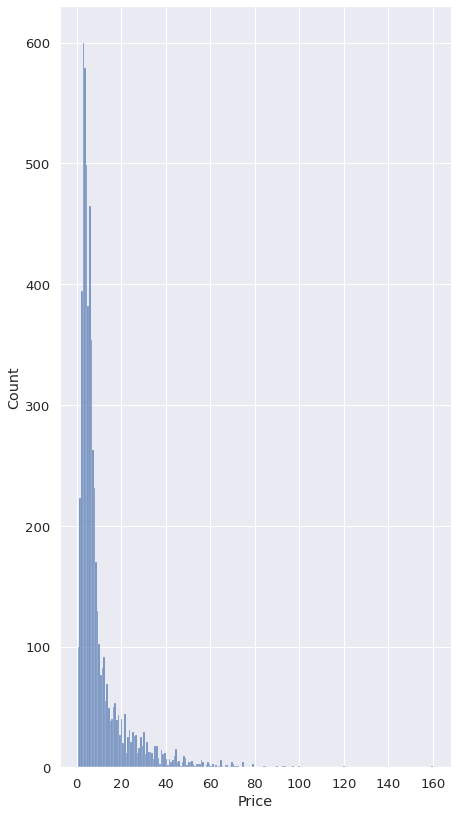

In [150]:
sns.histplot(data=data, x='Price');

In [151]:
numericals_cols = ['Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Price']

### Install Datasist
Paket python yang menyediakan antarmuka yang cepat dan asbtrak untuk fungsi atau teknik populer dan sering digunakan yang berkaitan dengan analisis data, visualisasi, eksplorasi data, rekayasa fitur, komputer, NLP, dan Deep Learning, pemodelan, dan penerapan model.

In [152]:
pip install datasist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/






































































In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 5912 entries, 0 to 6018

Data columns (total 14 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         5912 non-null   Int64  

 1   Name               5912 non-null   string 

 2   Location           5912 non-null   string 

 3   Year               5912 non-null   Int64  

 4   Kilometers_Driven  5912 non-null   Int64  

 5   Fuel_Type          5912 non-null   string 

 6   Transmission       5912 non-null   string 

 7   Owner_Type         5912 non-null   string 

 8   Mileage            5912 non-null   Float64

 9   Engine             5912 non-null   Int64  

 10  Power              5912 non-null   Float64

 11  Seats              5912 non-null   Int64  

 12  Price              5912 non-null   Float64

 13  Brand              5912 non-null   string 

dtypes: Float64(3), Int64(5), string(6)

memory usage: 739.0 KB


### Remove outliers with datasist package

In [154]:
data_nums = data.copy()
from datasist.structdata import detect_outliers

outliers = detect_outliers(data_nums[numericals_cols], 0, data_nums[numericals_cols].columns)
data_nums.drop(outliers, inplace=True)

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 5912 entries, 0 to 6018

Data columns (total 14 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         5912 non-null   Int64  

 1   Name               5912 non-null   string 

 2   Location           5912 non-null   string 

 3   Year               5912 non-null   Int64  

 4   Kilometers_Driven  5912 non-null   Int64  

 5   Fuel_Type          5912 non-null   string 

 6   Transmission       5912 non-null   string 

 7   Owner_Type         5912 non-null   string 

 8   Mileage            5912 non-null   Float64

 9   Engine             5912 non-null   Int64  

 10  Power              5912 non-null   Float64

 11  Seats              5912 non-null   Int64  

 12  Price              5912 non-null   Float64

 13  Brand              5912 non-null   string 

dtypes: Float64(3), Int64(5), string(6)

memory usage: 868.0 KB


### Data without outliers info

In [156]:
data_nums.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 4929 entries, 0 to 6018

Data columns (total 14 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         4929 non-null   Int64  

 1   Name               4929 non-null   string 

 2   Location           4929 non-null   string 

 3   Year               4929 non-null   Int64  

 4   Kilometers_Driven  4929 non-null   Int64  

 5   Fuel_Type          4929 non-null   string 

 6   Transmission       4929 non-null   string 

 7   Owner_Type         4929 non-null   string 

 8   Mileage            4929 non-null   Float64

 9   Engine             4929 non-null   Int64  

 10  Power              4929 non-null   Float64

 11  Seats              4929 non-null   Int64  

 12  Price              4929 non-null   Float64

 13  Brand              4929 non-null   string 

dtypes: Float64(3), Int64(5), string(6)

memory usage: 616.1 KB


### Visualize Histogram of Numeric Column

#### Kilometers_Driven Column

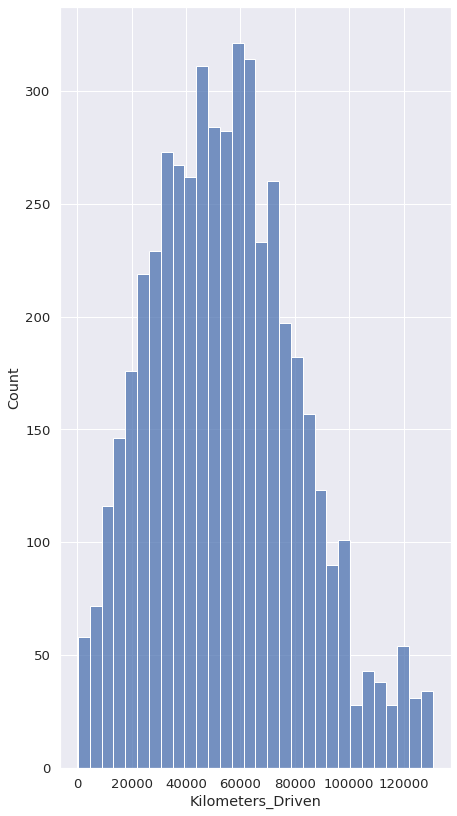

In [157]:
sns.histplot(data=data_nums, x='Kilometers_Driven');

#### Mileage Column

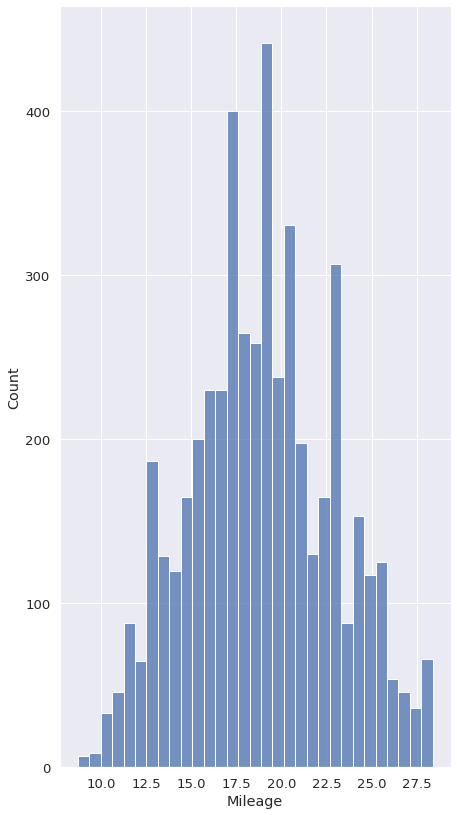

In [158]:
sns.histplot(data=data_nums, x='Mileage');

#### Engine Column

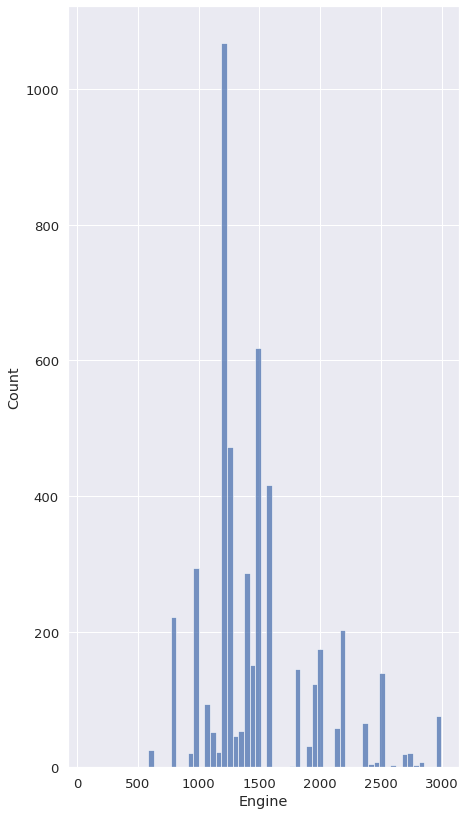

In [159]:
sns.histplot(data=data_nums, x='Engine');

#### Power Column

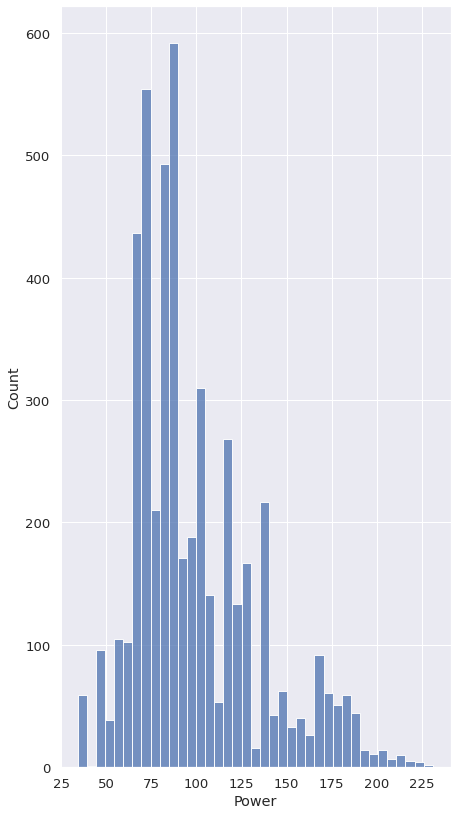

In [160]:
sns.histplot(data=data_nums, x='Power');

#### Price Column

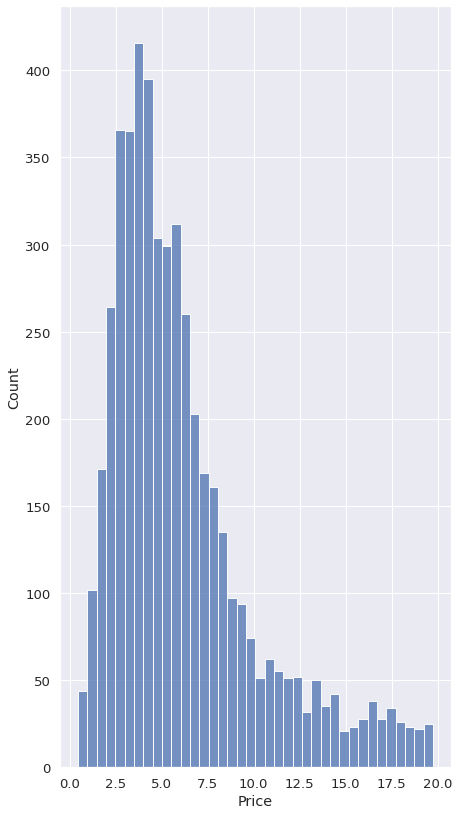

In [161]:
sns.histplot(data=data_nums, x='Price');

### **Data summary**
- Kolom-kolom numerik mengikuti distribusi Gaussian, tetapi memiliki *outliers*. *Outliers* ini tidak akan dihapus karena dapat berguna.
- Persebaran penjualan terbesar adalah Mumbai dan yang paling kecil adalah Ahmedabad.

In [162]:
data

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand
0,0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5,1.75,Maruti
1,1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5,12.5,Hyundai
2,2,Honda Jazz,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5,4.5,Honda
3,3,Maruti Ertiga,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7,6.0,Maruti
4,4,Audi A4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5,17.74,Audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift,Delhi,2014,27365,Diesel,Manual,First,28.4,1248,74.0,5,4.75,Maruti
6015,6015,Hyundai Xcent,Jaipur,2015,100000,Diesel,Manual,First,24.4,1120,71.0,5,4.0,Hyundai
6016,6016,Mahindra Xylo,Jaipur,2012,55000,Diesel,Manual,Second,14.0,2498,112.0,8,2.9,Mahindra
6017,6017,Maruti Wagon,Kolkata,2013,46000,Petrol,Manual,First,18.9,998,67.1,5,2.65,Maruti


## **3. Data Pre-Processing** 

### **Data Transformation**

#### **Categorical Transformation**

##### **Ordinal Transformation (Label Encoding)**

Kode di bawah ini digunakan untuk mengkodekan (*encoding*) fitur kategoris Owner_Type menjadi numerik menggunakan konsep label encoding.

In [163]:
transformation = {
    'First' : 3,
    'Second' : 2,
    'Third' : 1,
    'Fourth & Above' : 0
}

In [164]:
data['Owner_Type'] = data['Owner_Type'].map(transformation)

In [165]:
data['Owner_Type']

0       3
1       3
2       3
3       3
4       2
       ..
6014    3
6015    3
6016    2
6017    3
6018    3
Name: Owner_Type, Length: 5912, dtype: int64

Kasus terbaik dari *owner type* adalah pertama (*first*), dan kasus terburuknya adalah keempat dan selebihnya (*fourth & above*).

##### **Nominal Transformation (One Hot Encoding)**

Kode di bawah digunakan untuk mengkodekan (*encoding*) fitur Name, Location, Fuel_Type, Transmission, dan Brand yang merupakan fitur kategoris menjadi numerik menggunakan metode *binary encoder* menggunakan konsep One Hot Encoding.

In [166]:
Nominal_data = ['Name', 'Location', 'Fuel_Type', 'Transmission', 'Brand']
binaryencoder = ce.BinaryEncoder(cols=Nominal_data)
data = binaryencoder.fit_transform(data)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 5912 entries, 0 to 6018

Data columns (total 31 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         5912 non-null   Int64  

 1   Name_0             5912 non-null   int64  

 2   Name_1             5912 non-null   int64  

 3   Name_2             5912 non-null   int64  

 4   Name_3             5912 non-null   int64  

 5   Name_4             5912 non-null   int64  

 6   Name_5             5912 non-null   int64  

 7   Name_6             5912 non-null   int64  

 8   Name_7             5912 non-null   int64  

 9   Location_0         5912 non-null   int64  

 10  Location_1         5912 non-null   int64  

 11  Location_2         5912 non-null   int64  

 12  Location_3         5912 non-null   int64  

 13  Year               5912 non-null   Int64  

 14  Kilometers_Driven  5912 non-null   Int64  

 15  Fuel_Type_0        5912 non-null   int64  

 16  Fue

Setelah dilakukan one hot encoding, semua kolom memiliki tipe data numerik. Dimana, supaya tidak ada fitur (kolom) yang mendominasi, selanjutnya kita terapkan data scaling.

In [168]:
data.sample(5)

,Unnamed: 0,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Location_0,...,Mileage,Engine,Power,Seats,Price,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
3547,3547,0,0,1,1,0,1,0,0,1,...,19.44,1198,67.0,7,3.25,1,0,0,0,1
5753,5753,0,0,1,0,1,1,0,0,0,...,20.45,1461,83.8,5,6.0,0,0,1,0,1
964,964,0,0,0,0,0,1,0,1,1,...,16.55,1968,147.51,5,9.95,0,0,1,0,0
193,193,0,0,0,0,0,1,0,0,0,...,25.47,1248,88.5,7,8.5,0,0,0,0,1
4436,4436,0,0,0,1,1,0,0,1,0,...,14.53,1798,138.1,5,3.5,0,0,1,1,0


#### **Numerical Transformation**

In [169]:
Numerical_data = ['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

In [170]:
# Menerapkan PowerTransformer untuk melakukan data scaling dengan jenis standarisasi (standarization)
new_df = pd.DataFrame(PowerTransformer().fit_transform(data), columns=data.columns, index=data.index)

In [171]:
new_df.sample(5)

,Unnamed: 0,Name_0,Name_1,Name_2,Name_3,Name_4,Name_5,Name_6,Name_7,Location_0,...,Mileage,Engine,Power,Seats,Price,Brand_0,Brand_1,Brand_2,Brand_3,Brand_4
3804,0.512460,-0.285649,-0.502800,-0.733199,1.149022,-0.932262,0.995275,1.105315,-1.073755,1.608533,...,0.828520,-0.239052,-0.298198,-0.293644,-0.706579,-0.289785,-0.605492,-0.864915,0.909677,-1.085881
4829,1.012383,-0.285649,-0.502800,-0.733199,1.149022,-0.932262,-1.004747,-0.904720,-1.073755,-0.621684,...,1.775247,-0.028468,-0.030931,-0.293644,-0.350752,-0.289785,-0.605492,-0.864915,0.909677,0.920911
3474,0.343462,-0.285649,-0.502800,-0.733199,1.149022,1.072660,0.995275,1.105315,-1.073755,-0.621684,...,-0.487615,-0.702671,-0.786274,-0.293644,0.071415,-0.289785,-0.605492,1.156183,0.909677,0.920911
4665,0.934639,-0.285649,-0.502800,-0.733199,-0.870305,1.072660,-1.004747,-0.904720,0.931311,-0.621684,...,-0.744235,0.162133,0.091188,-0.293644,-0.426403,-0.289785,-0.605492,1.156183,0.909677,0.920911
4671,0.937497,-0.285649,1.988863,-0.733199,1.149022,1.072660,0.995275,1.105315,-1.073755,-0.621684,...,-0.521031,-0.026488,0.244806,-0.293644,0.318465,-0.289785,1.651550,1.156183,0.909677,0.920911


In [172]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 5912 entries, 0 to 6018

Data columns (total 31 columns):

 #   Column             Non-Null Count  Dtype  

---  ------             --------------  -----  

 0   Unnamed: 0         5912 non-null   float64

 1   Name_0             5912 non-null   float64

 2   Name_1             5912 non-null   float64

 3   Name_2             5912 non-null   float64

 4   Name_3             5912 non-null   float64

 5   Name_4             5912 non-null   float64

 6   Name_5             5912 non-null   float64

 7   Name_6             5912 non-null   float64

 8   Name_7             5912 non-null   float64

 9   Location_0         5912 non-null   float64

 10  Location_1         5912 non-null   float64

 11  Location_2         5912 non-null   float64

 12  Location_3         5912 non-null   float64

 13  Year               5912 non-null   float64

 14  Kilometers_Driven  5912 non-null   float64

 15  Fuel_Type_0        5912 non-null   float64

 16  Fue

Setelah dilakukan data scaling, semua data berada pada range -1 sampai 1 dan bertipe data float.

### **Data Splitting**

Kode di bawah digunakan untuk memisahkan kolom-kolom menjadi kolom fitur (X) dan kolom kelas/ label (y). Kemudian, data fitur (X) dan label (y) akan dipisah menjadi *train set* dan *test set*.

In [173]:
# define dataset
X, y = new_df.drop('Price',axis=1), new_df['Price']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## **4. Modeling**

### **Linear Regression (OLS method)**

In [174]:
reg = LinearRegression().fit(X_train,(y_train))
print('R-Squered Train',round((reg.score(X_train, (y_train))*100),2),'%')
print('R-Squered Test', round((reg.score(X_test, (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f'RMSE: {mean_squared_error(y_pred, (y_test))}')

R-Squered Train 87.81 %

R-Squered Test 88.4 %

RMSE: 0.11028248874777868


### **Linear Regression (Lasso Method)**

In [175]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
poly_reg.fit(X_train)

PolynomialFeatures()

In [176]:
X_train = poly_reg.transform(X_train)
X_test = poly_reg.transform(X_test)

In [177]:
reg = LassoCV().fit(X_train, (y_train))
print('R-Squered Train',round((reg.score(X_train, (y_train))*100),2),'%')
print('R-Squered Test',round((reg.score(X_test, (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f'RMSE: {mean_squared_error(y_pred,(y_test))}')

R-Squered Train 94.96 %

R-Squered Test 94.43 %

RMSE: 0.05299341980334996


### **Linear Regression (ElasticNetCV Method)**

In [178]:
reg = ElasticNetCV().fit(X_train,(y_train))
print('R-Squered Train',round((reg.score(X_train, (y_train))*100),2),'%')
print('R-Squered Test',round((reg.score(X_test, (y_test))*100),2),'%')
y_pred = reg.predict(X_test)
print(f'RMSE: {mean_squared_error(y_pred,(y_test))}')

R-Squered Train 94.98 %

R-Squered Test 94.43 %

RMSE: 0.05295312143740461


Ketiga percobaan diatas menunjukkan bahwa metode ElasticNetCV menghasilkan model regresi dengan kinerja terbaik yang ditunjukkan dengan:
*   Akurasi training : 94.98 %
*   Akurasi test : 94.43 %
*   RMSE : 0.052953



## **5. Visualization**

In [179]:
array1 = y_test.to_numpy()

### **Visualize Sample y_test Data and Prediction Data**

In [180]:
# Visualisasi 100 data pertama
a = array1[:100]
b = y_pred[:100]

print(len(a))
print(len(b))

100

100


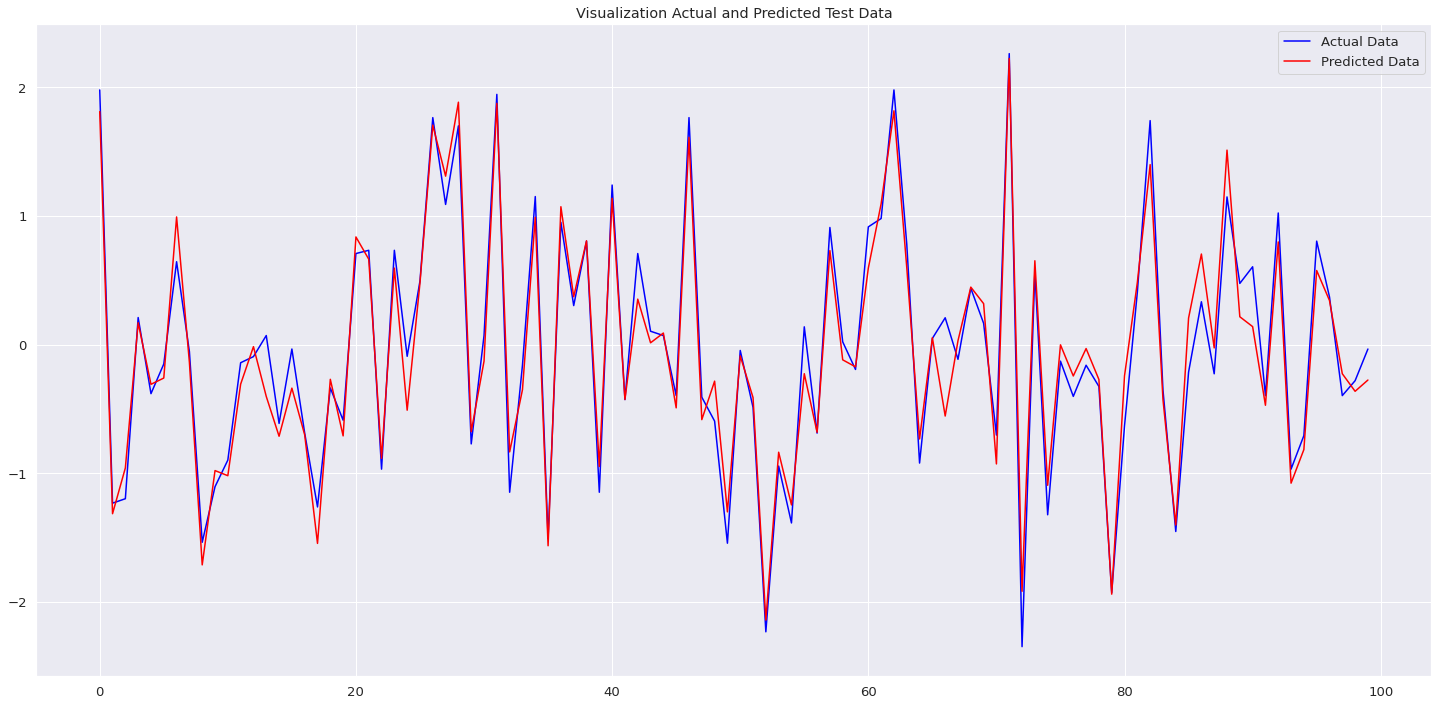

In [181]:
fig, ax = plt.subplots(figsize =(25, 12))
plt.title('Visualization Actual and Predicted Test Data')
plt.plot(a, c='blue', label='Actual Data')
plt.plot(b, c='red', label='Predicted Data')
plt.legend()
plt.show()

Dapat terlihat bahwa, data prediksi yang dihasilkan oleh model hampir menutupi bagian y_test data yang mana bisa diartikan bahwa nilai yang dihasilkan oleh model mendekati dengan nilai yang sebenarnya.

### **Visualize all y_test Data and Predicted Data**

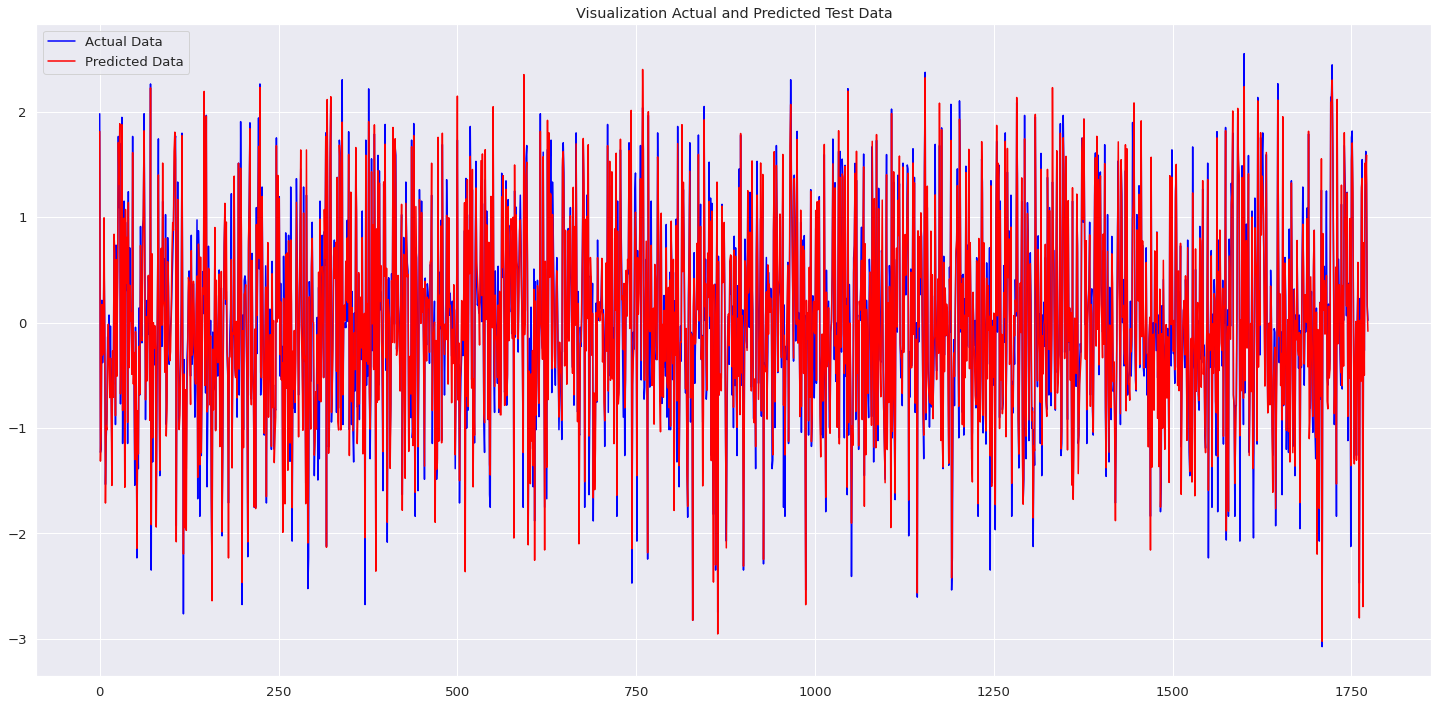

In [182]:
fig, ax = plt.subplots(figsize =(25, 12))
plt.title('Visualization Actual and Predicted Test Data')
plt.plot(array1, c='blue', label='Actual Data')
plt.plot(y_pred, c='red', label='Predicted Data')
plt.legend()
plt.show()